#  **Project: Capstone Project 1 – (Data Storytelling Exercise section 7.2)**

**Project name: -** Explanatory Analysis of Traffic pullover pattern for Florida v/s Vermont

**Student Name: -** Jitendra Agarwal 

**Course: -** Springboard cohort Jan2 2018
  
**Data set Source: -** https://openpolicing.stanford.edu/data/ 

**Data provider: -** Openpolicing project by Stanford


## **About the DATA**
The Raw data for this project contains the traffic stop data collected for 30+ states for open police project by Stanford research team. Standardized stop data are available to download (by state) from the link above provided by Stanford.
The csv includes a subset of common fields for each state and indicates whether data are available for at least 70% of records in that state. Some states have more fields.
The original, unprocessed data we collected contain even more information.
The Stanford Open Policing Project data are made available under the Open Data Commons Attribution License.

Downloaded excel sheet of raw data for VT: -
https://github.com/jiagarwa/capstone-project1-Jitendra

file name: - ‘VT-clean.csv.gz’

### **Accessing and filtering the Data**

1. **Read data **

    Read Data from csv file VT-clean.csv and Show the all columns of data and their data type.

In [100]:
#Import Pandas and read csv into a DataFrame

import pandas as pd

def filter_csv_to_df(filename, year, chunk):
    
    df_new=pd.DataFrame()

    if chunk <= 10000 or chunk >= 100000000:
        chunk = 10 ** 8

    if year == '' :
        year = 2015
        
    for data in pd.read_csv(filename, chunksize=chunk, low_memory=False):
        df = pd.DataFrame(data)
        df_new = pd.concat([df_new, df], axis=0)
        
        if year == 0:
            filter_df = df_new
        else:
            filter_df = df_new.loc[pd.to_datetime(df_new['stop_date']).dt.year == year]
            
    return filter_df


In [101]:
#Import Pandas and read csv into a DataFrame

import pandas as pd
#data = pd.read_csv('../data/VT-clean.csv')
data = filter_csv_to_df('../data/FL_2015.csv', 2015, 100000000)
traffic_2015 = pd.DataFrame(data)

traffic_2015.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 795443 entries, 0 to 795442
Data columns (total 29 columns):
Unnamed: 0               795443 non-null int64
id                       795443 non-null object
state                    795443 non-null object
stop_date                795443 non-null object
stop_time                795437 non-null object
location_raw             795443 non-null object
county_name              795442 non-null object
county_fips              795442 non-null float64
fine_grained_location    225760 non-null object
police_department        0 non-null float64
driver_gender            412124 non-null object
driver_age_raw           411902 non-null float64
driver_age               410575 non-null float64
driver_race_raw          795275 non-null object
driver_race              795275 non-null object
violation_raw            773633 non-null object
violation                773633 non-null object
search_conducted         773633 non-null object
search_type_raw          77

2. **Filter data for Year 2015: -**

    Convert data into a data frame and filter based on year from stop_date column and save in a separate file Filter data by year 2015. Call it VT_2015.csv

1. **Data Observations: **
    we have a pretty consistence data population throughout the year and all the attributes are populated across the board.

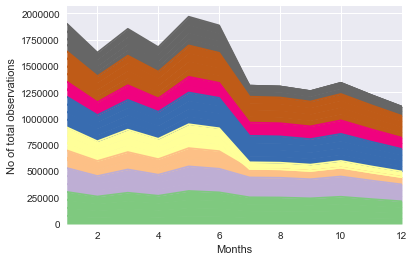

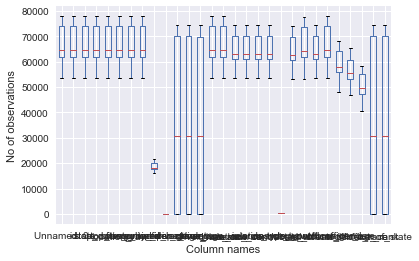

In [102]:
#check monthly total counts and use it to draw area plot and Box plot
import matplotlib.pyplot as plt

monthly_traffic = traffic_2015.groupby(pd.to_datetime(traffic_2015['stop_date']).dt.month).count()
monthly_traffic.plot.area(legend = False, colormap='Accent')

plt.xlabel('Months')
plt.ylabel('No of total observations')
plt.show()

monthly_traffic.boxplot()
plt.xlabel('Column names')
plt.ylabel('No of observations')
plt.show()

• **Drop rows with missing key data**

    Drop records where the traffic stop reason or the stop outcome is unknown. 
    These records will not be useful in any meaningful analysis.
    

In [103]:
VT_traf_2015_main = traffic_2015.dropna(subset = ['state'])
VT_traf_2015_main.loc['driver_race'] = VT_traf_2015_main['driver_race'].fillna('Other')

##### **Import Numphy and Aggregate data for further analysis**

Most of the reports in this exploratory analysis will be done based on logical grouping of data by date, time and other factors So aggregating data upfront is also useful. We will use pivot table features for aggregating data based on these criteria for analysis.

- Aggregate by time of the day (slot of 4 hours)
- Aggregate by day of the week
- Aggregate by month
- Aggregate by age range (each slot of 10 years)

In [104]:
#Aggregate by age

import numpy as np
VT_agg_age = pd.pivot_table(VT_traf_2015_main, values='id', index=['driver_age'], columns=['driver_gender'], 
                            aggfunc=np.count_nonzero)

In [105]:
#Aggregate by Month

VT_agg_month = pd.pivot_table(VT_traf_2015_main, values='id', index=[pd.to_datetime(VT_traf_2015_main['stop_date'])
                                                                     .dt.month], columns=['driver_gender'], aggfunc=np.count_nonzero)

In [106]:
#Aggregate by hour of the day

VT_agg_time = pd.pivot_table(VT_traf_2015_main, values='id', index=pd.to_datetime(VT_traf_2015_main['stop_time'])
                             .dt.hour, columns=['driver_gender'], aggfunc=np.count_nonzero)

In [107]:
# Number of average monthly stop

female_monthly_averages = VT_agg_month.aggregate({"F":np.mean})
male_monthly_averages = VT_agg_month.aggregate({"M":np.mean})
print('Number of average monthly stop for Male are:', np.around(male_monthly_averages['M'], decimals=-1),
      ' and Number of average monthly stop for Female are: ' ,np.around(female_monthly_averages['F'], decimals=-1))

Number of average monthly stop for Male are: 46430.0  and Number of average monthly stop for Female are:  22260.0


In [108]:
#Number of average Daily stop

VT_agg_date = pd.pivot_table(VT_traf_2015_main, values='id', index=pd.to_datetime(VT_traf_2015_main['stop_date'])
                             ,columns=['driver_gender'], aggfunc=np.count_nonzero)
weekday_averages = VT_agg_date.aggregate({np.mean})
print('Number of average Daily stop for Male are: ', np.around(weekday_averages['M']['mean'], decimals=0),
      ' and same Number of Female is: ' ,np.around(weekday_averages['F']['mean'], decimals=0))

Number of average Daily stop for Male are:  1539.0  and same Number of Female is:  738.0


In [109]:
# Approx Number of average stop per hour

VT_agg_hour = pd.pivot_table(VT_traf_2015_main, values='id', 
                             index=[pd.to_datetime(VT_traf_2015_main['stop_date']), 
                            pd.to_datetime(VT_traf_2015_main['stop_time']).dt.hour], 
                             columns=['driver_gender'], aggfunc=np.count_nonzero)
hourly_averages = VT_agg_hour.aggregate({np.mean})

print('Approx Number of average stop per hour for Male are: ', np.around(hourly_averages['M']['mean'], decimals=0),
      ' and same Number of Female is: ' ,np.around(hourly_averages['F']['mean'], decimals=0))

Approx Number of average stop per hour for Male are:  64.0  and same Number of Female is:  31.0


  2. **Exploratory Analysis to find something interesting. **
    
      • **Traffic stops by race.**

/Users/jitendra_agarwal/anaconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:179: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


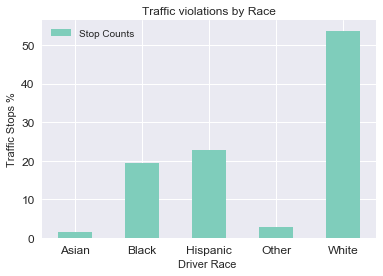

driver_gender      F       M     M%     F%   total  total%
driver_race                                               
Asian           2019    3738   1.34   1.51    5757    1.40
Black          28503   51169  18.37  21.35   79672   19.33
Hispanic       24598   69592  24.98  18.42   94190   22.86
Other           3210    7923   2.84   2.40   11133    2.70
White          75190  146124  52.46  56.31  221314   53.71


In [110]:
# Plot Traffic stops by race

VT_race_gender = pd.pivot_table(VT_traf_2015_main, values='id', 
                index=VT_traf_2015_main['driver_race'], columns=['driver_gender'], aggfunc=np.count_nonzero)  
total = VT_race_gender.apply(np.sum)
VT_race_gender['M%'] = np.around((VT_race_gender['M'] / total['M'])* 100, decimals=2) 
VT_race_gender['F%'] = np.around((VT_race_gender['F'] / total['F'])* 100, decimals=2)
VT_race_gender['total'] = (VT_race_gender['F'] + VT_race_gender['M'])
VT_race_gender['total%'] = np.around((VT_race_gender['total'] / (total['F']+total['M']))* 100, decimals=2)
VT_race_gender['total%'].plot(kind='bar', figsize=(6, 4), label = 'Stop Counts', fontsize=12, legend=True, 
                                colors=['#7fcdbb'])
plt.xticks(rotation=0)
plt.title('Traffic violations by Race')
plt.xlabel('Driver Race ')
plt.ylabel('Traffic Stops %')
plt.show()

print(VT_race_gender)

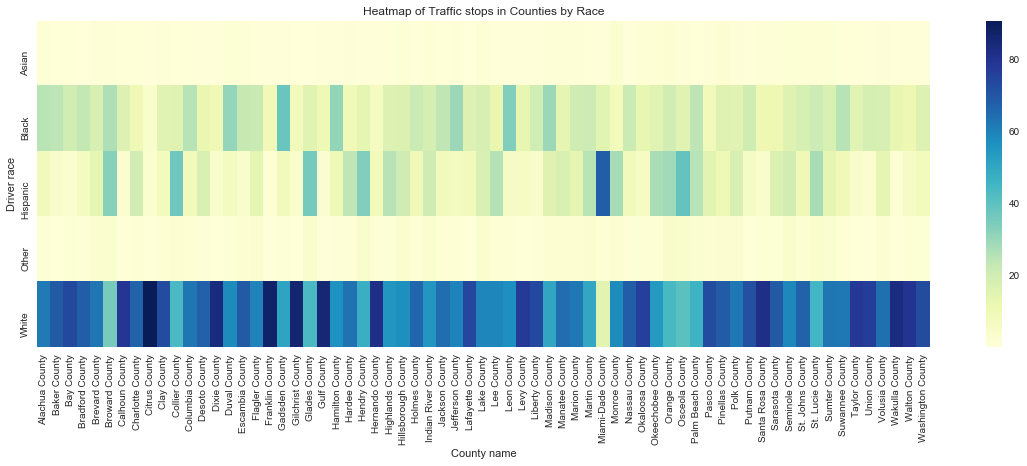

In [111]:
# Plot Traffic stops by race
import seaborn as sns
sns.set()

VT_race_county = pd.pivot_table(VT_traf_2015_main, values='id', 
                index=VT_traf_2015_main['driver_race'], columns=['county_name'], aggfunc=np.count_nonzero)  
total_c = VT_race_county.apply(np.sum)

VT_race_county_new = (VT_race_county/total_c)*100
plt.figure(figsize=(20,6))
ax = sns.heatmap(VT_race_county_new, cmap="YlGnBu")
ax = plt.xlabel('County name')
ax = plt.ylabel('Driver race')
ax = plt.title('Heatmap of Traffic stops in Counties by Race')

plt.show()


    • **Traffic violations by Type and % Traffic Stop Outcome**


In [112]:
# %Traffic stops by Arrest 

VT_arrest_gender = pd.pivot_table(VT_traf_2015_main, values='id', 
                index=VT_traf_2015_main['is_arrested'], columns=['driver_gender'], aggfunc=np.count_nonzero) 
total = VT_arrest_gender.apply(np.sum)
VT_arrest_gender['M%'] = np.around((VT_arrest_gender['M'] / total['M'])* 100, decimals=2) 
VT_arrest_gender['F%'] = np.around((VT_arrest_gender['F'] / total['F'])* 100, decimals=2) 
print(VT_arrest_gender)

driver_gender       F       M     M%     F%
is_arrested                                
False          122884  253863  96.08  97.44
True             3230   10350   3.92   2.56


/Users/jitendra_agarwal/anaconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:179: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


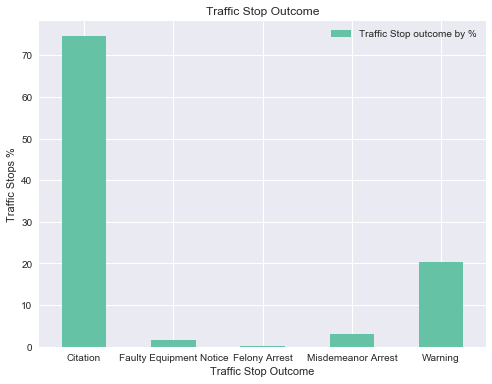

                                id
stop_outcome                      
Citation                 74.594217
Faulty Equipment Notice   1.625025
Felony Arrest             0.267032
Misdemeanor Arrest        3.148635
Warning                  20.365091


In [113]:
# Show the ratio of different type of violation

VT_stop_outcome = pd.pivot_table(VT_traf_2015_main, values='id', 
                index=VT_traf_2015_main['stop_outcome'], aggfunc=np.count_nonzero)

total_o = VT_stop_outcome.apply(np.sum)
VT_stop_outcome_new = (VT_stop_outcome/total_o)*100

VT_stop_outcome_new['id'].plot(kind='bar', figsize=(8, 6), label = 'Traffic Stop outcome by %', fontsize=10, legend=True, 
                               colors=['#66c2a5','#9ebcda','#f03b20','#ffeda0','#8856a7'])
plt.title('Traffic Stop Outcome')
plt.xticks(rotation=0)
plt.xlabel('Traffic Stop Outcome')
plt.ylabel('Traffic Stops %')
plt.show()
print(VT_stop_outcome_new)

/Users/jitendra_agarwal/anaconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:179: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


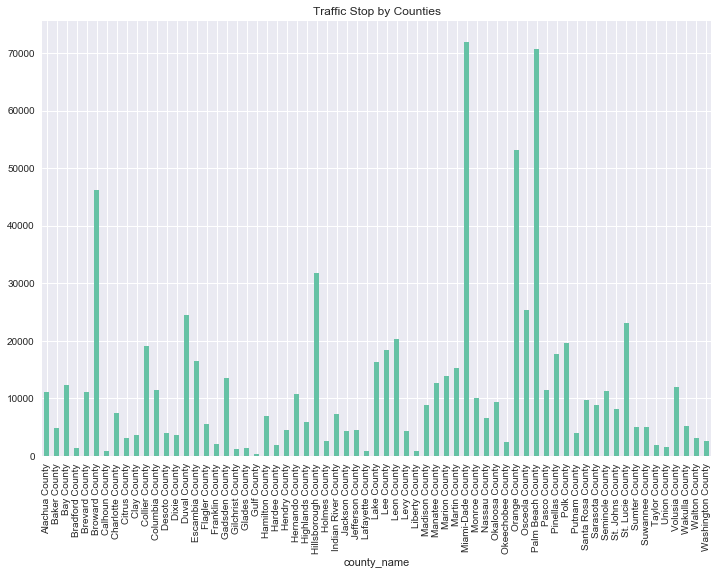

In [114]:
#Traffic stops distribution by Various counties

VT_county_name = pd.pivot_table(VT_traf_2015_main, values='id', 
                index=VT_traf_2015_main['county_name'], aggfunc=np.count_nonzero)
VT_county_name['id'].plot(kind='bar', figsize=(12, 8), label = 'county_name', fontsize=10, 
                              colors=['#66c2a5','#fc8d62','#a6bddb','#fbb4ae','#ccebc5','#2b8cbe','#addd8e'])
plt.plot.legend=True
plt.title('Traffic Stop by Counties')
plt.show()

3. **Finding trends**

    • **Comparison of Male v/s Female in traffic stops over weekdays**

driver_race  Asian  Black  Hispanic  Other  White
stop_date                                        
0.0           1656  23941     27652   3293  63797
1.0           1666  23395     28025   3140  67418
2.0           1612  21912     25993   2995  62887
3.0           1491  21496     26648   2942  60336
4.0           1590  24032     29013   3350  64766
5.0           1579  21610     25437   2985  53152
6.0           1560  19578     23193   2869  48266


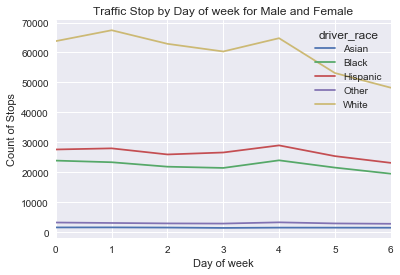

In [115]:
#Aggregate by Day of week

VT_agg_day = pd.pivot_table(VT_traf_2015_main, values='id', index=pd.to_datetime(VT_traf_2015_main['stop_date']).
                            dt.dayofweek, columns=['driver_race'], aggfunc=np.count_nonzero)
print(VT_agg_day)
VT_agg_day.plot(kind='line', legend = 'Driver gender')
plt.xlabel('Day of week')
plt.ylabel('Count of Stops')
plt.title('Traffic Stop by Day of week for Male and Female')
plt.show()

In [116]:
# Top 5 hours of the day for traffic stops

VT_top_time_M = pd.DataFrame(VT_agg_time.nlargest(5, 'M'))
VT_top_time_F = pd.DataFrame(VT_agg_time.nlargest(5, 'F'))
print('The most common time for traffic pullover for man is \n', VT_top_time_M['M'], '\n', VT_top_time_F['F'])

The most common time for traffic pullover for man is 
 stop_time
10.0    22040
16.0    21609
15.0    21605
9.0     20240
11.0    19418
Name: M, dtype: int64 
 stop_time
8.0     10505
10.0    10464
9.0     10188
15.0     9997
16.0     9957
Name: F, dtype: int64


In [117]:
# Top 5 hours of the day. Weekend has an increase or decrease in traffic stops?
VT_agg_hour_day = pd.pivot_table(VT_traf_2015_main, values='id', 
                             index=[pd.to_datetime(VT_traf_2015_main['stop_date']).dt.dayofweek, 
                            pd.to_datetime(VT_traf_2015_main['stop_time']).dt.hour], 
                             columns=['driver_gender'], aggfunc=np.count_nonzero)
VT_top_daytime_M = pd.DataFrame(VT_agg_hour_day.nlargest(5, 'M'))
VT_top_daytime_F = pd.DataFrame(VT_agg_hour_day.nlargest(5, 'F'))
print('The most common time for traffic pullover for man is \n', VT_top_daytime_M['M'], '\n', VT_top_daytime_F['F'])


The most common time for traffic pullover for man is 
 stop_date  stop_time
1.0        16.0         3709
           10.0         3703
           15.0         3560
0.0        10.0         3482
           16.0         3441
Name: M, dtype: int64 
 stop_date  stop_time
0.0        8.0          1699
1.0        8.0          1679
           15.0         1621
           10.0         1611
6.0        9.0          1598
Name: F, dtype: int64


• **Traffic stops over the time for entire week**


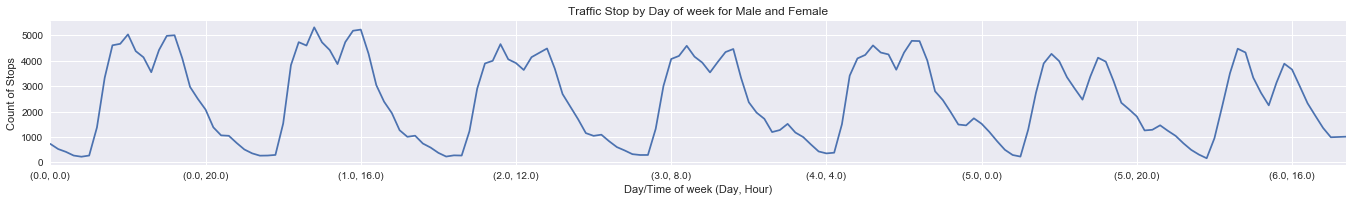

In [118]:
VT_agg_hour_day['total'] = (VT_agg_hour_day['F'] + VT_agg_hour_day['M'])
plt.axes([0, 0, 3, .5])
VT_agg_hour_day['total'].plot(kind='line', legend = False, )
plt.xlabel('Day/Time of week (Day, Hour)')
plt.ylabel('Count of Stops')
plt.title('Traffic Stop by Day of week for Male and Female')
plt.show()

In [119]:
# Top 5 hours of the day for traffic stops
VT_top_age_M = pd.DataFrame(VT_agg_age.nlargest(5, 'M'))
VT_top_age_F = pd.DataFrame(VT_agg_age.nlargest(5, 'F'))
print('The most common age of driver for traffic pullover for man is \n',
      VT_top_age_M['M'], '\n and for female it is \n', VT_top_age_F['F'])

The most common age of driver for traffic pullover for man is 
 driver_age
24.0    8099.0
22.0    7881.0
21.0    7864.0
23.0    7807.0
25.0    7745.0
Name: M, dtype: float64 
 and for female it is 
 driver_age
21.0    5179.0
22.0    5083.0
23.0    4925.0
24.0    4915.0
20.0    4855.0
Name: F, dtype: float64


In [120]:
# Most common reason for traffic stops

VT_agg_cause = pd.pivot_table(VT_traf_2015_main, values='id', index=VT_traf_2015_main['violation'], 
                              columns=['driver_gender'], aggfunc=np.count_nonzero)
print(VT_agg_cause.sort_values(('M'), ascending=[0]))

driver_gender                                             F        M
violation                                                           
Speeding                                            55722.0  95079.0
Truck                                                2929.0  30246.0
Safe movement                                       12671.0  22993.0
Seat belt                                            5064.0  14962.0
Equipment                                            3871.0  10193.0
Paperwork,Speeding                                   6960.0   9511.0
License,Speeding                                     4311.0   7358.0
Registration/plates,Speeding                         4350.0   6228.0
Equipment,Speeding                                   3015.0   5286.0
Other                                                1026.0   2653.0
Registration/plates                                   868.0   2618.0
Equipment,Truck                                       235.0   2120.0
Paperwork,Registration/plates,Spee

• **Histogram of age range and frequency of stops**


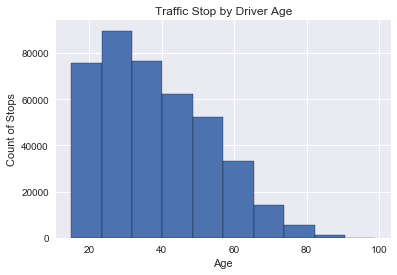

In [121]:
#Histogram of age ranges 
import seaborn as sns
sns.set()
VT_traf_2015_main['driver_age'].plot('hist', edgecolor="k", label = '', legend=False)
plt.xlabel('Age')
plt.ylabel('Count of Stops')
plt.title('Traffic Stop by Driver Age')
plt.show()

• **Bar plot of Stop hour and count of stop at each hour.**


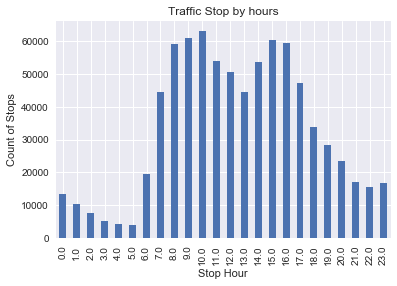

In [122]:
#bar plot of stop time hour
newdf = VT_traf_2015_main[['stop_time']].groupby(pd.to_datetime(VT_traf_2015_main['stop_time'])
                             .dt.hour).count()
newdf.plot(kind='bar', label = '', legend=False)
plt.xlabel('Stop Hour')
plt.ylabel('Count of Stops')
plt.title('Traffic Stop by hours')
plt.show()

• **Bar plot of police departments and count of stop by each Department**


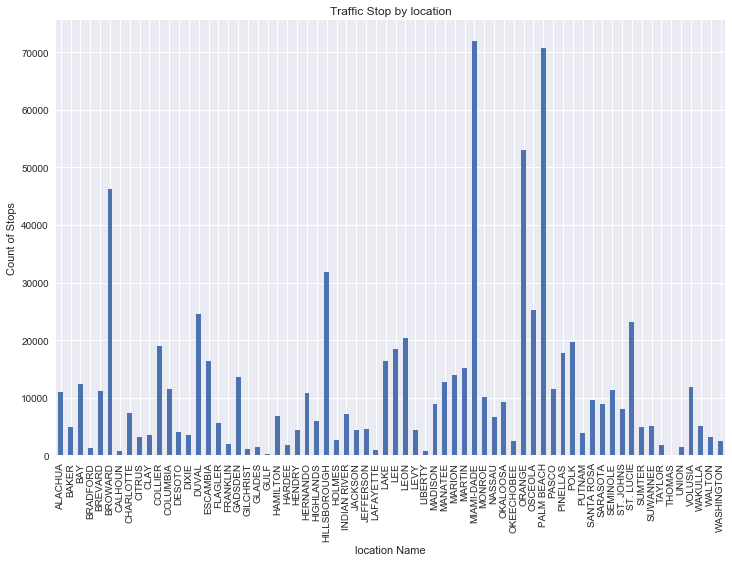

In [123]:
#bar plot of stop time hour 
newdf = VT_traf_2015_main[['location_raw']].groupby(VT_traf_2015_main['location_raw']).count()
plt.figure(figsize=(12,8))
newdf.plot(kind='bar',  figsize=(12, 8), label = '', legend=False)
print()
plt.xlabel('location Name')
plt.ylabel('Count of Stops')
plt.title('Traffic Stop by location')
plt.show()

• **Compare by trend chart of Male V/s female and Driver age**


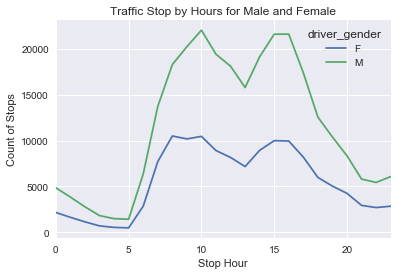

In [124]:
VT_agg_time.plot(kind='line', label = 'Driver gender')
plt.xlabel('Stop Hour')
plt.ylabel('Count of Stops')
plt.title('Traffic Stop by Hours for Male and Female')
plt.show()

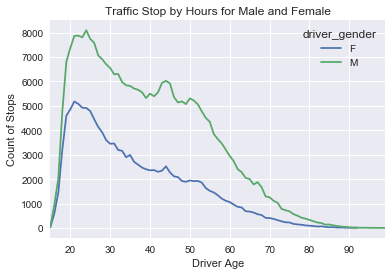

In [125]:
#Compare with trend chart of Male V/s female and Driver age
VT_agg_age.plot(kind='line')
plt.title('Traffic Stop by Hours for Male and Female')
plt.xlabel('Driver Age')
plt.ylabel('Count of Stops')
plt.show()

driver_race  Asian  Black  Hispanic  Other  White
stop_date                                        
1.0            138   1315      1789    223   3865
2.0            262   3228      4019    467   9666
3.0            248   2919      3963    451   9329
4.0            264   3305      4437    522  10075
5.0            219   3148      3946    414   9116
6.0            233   3089      3564    420   9131
7.0            218   3409      3934    470   9667
8.0            244   3118      3683    433   8914
9.0            201   2689      3123    406   7834
10.0           211   3296      3661    447   9696
11.0           242   3326      3743    476   8919
12.0           248   3351      3510    476   8714
13.0           209   3422      3706    435   8672
14.0           222   3101      3618    399   8674
15.0           179   2908      3411    425   8333
16.0           232   2949      3821    426   8327
17.0           205   3087      3594    416   8676
18.0           226   3148      3436    409   8301


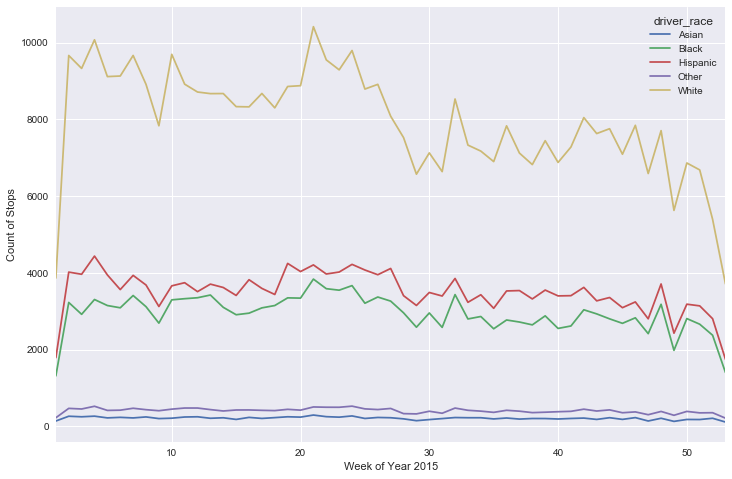

In [126]:
#Compare with trend chart of Male V/s female and time of the year (by week number)
VT_agg_week = pd.pivot_table(VT_traf_2015_main, values='id', index=[pd.to_datetime(VT_traf_2015_main['stop_date']).dt.week],
                             columns=['driver_race'], aggfunc=np.count_nonzero)
print(VT_agg_week)

VT_agg_week.plot(kind='line', figsize=(12, 8))
plt.xlabel('Week of Year 2015')
plt.ylabel('Count of Stops')
plt.show()

• **Time series plot**

    • Compare with trend chart of traffic stops over the dates of the entire year– using time series plot method.
 

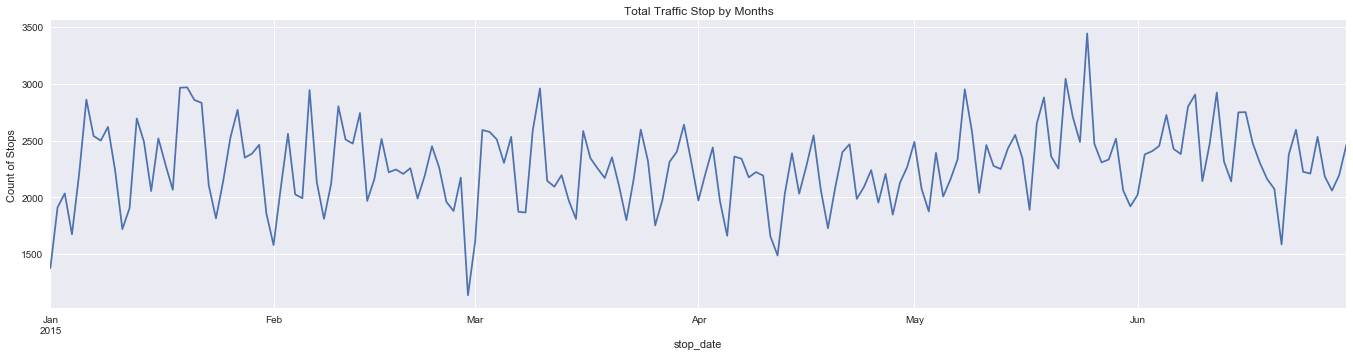

In [127]:
VT_agg_date = pd.pivot_table(VT_traf_2015_main, values='id', index=[pd.to_datetime(VT_traf_2015_main['stop_date'])],
                             columns=['driver_gender'], aggfunc=np.count_nonzero)
VT_agg_date['total'] = (VT_agg_date['F'] + VT_agg_date['M'])
ts = pd.Series(VT_agg_date['total'])
plt.axes([0, 0, 3, 1])
plt.xlabel('Month of the Year 2015')
plt.ylabel('Count of Stops')
plt.title('Total Traffic Stop by Months')
ts.plot(label = '', legend=False)
plt.show()

   5. **Distribution using Scatter plot**

       There is not much numeric data in the data set for this project so we are using a partially aggregated dataset for scatter plot.
  
• **The average stop counts during the Day by different hours**

In [128]:
# add couple of new calculcated column to the original Data Frame
VT_traf_2015_main.is_copy = False
VT_traf_2015_main['hour'] = pd.to_datetime(VT_traf_2015_main['stop_time']).dt.hour
VT_traf_2015_main['dayofweek'] = pd.to_datetime(VT_traf_2015_main['stop_date']).dt.dayofweek
VT_traf_2015_main.set_index(['hour', 'dayofweek'], append=True)


,,,Unnamed: 0,id,state,stop_date,stop_time,location_raw,county_name,county_fips,fine_grained_location,police_department,...,search_type,contraband_found,stop_outcome,is_arrested,officer_id,officer_gender,officer_age,officer_race,officer_rank,out_of_state
,hour,dayofweek,,,,,,,,,,,,,,,,,,,,,
0,0.0,3.0,4044601.0,FL-2015-000001,FL,2015-01-01,00:05,LEON,Leon County,12073.0,NaN,NaN,...,NaN,False,Citation,False,2874.0,M,27.0,White,TROOPER,True
1,0.0,3.0,4044602.0,FL-2015-000002,FL,2015-01-01,00:07,ORANGE,Orange County,12095.0,ORLANDO,NaN,...,NaN,False,Citation,False,3436.0,M,24.0,White,TROOPER,False
2,0.0,3.0,4044603.0,FL-2015-000003,FL,2015-01-01,00:08,SARASOTA,Sarasota County,12115.0,SARASOTA,NaN,...,NaN,False,Citation,False,3679.0,F,23.0,NaN,TROOPER,False
3,0.0,3.0,4044604.0,FL-2015-000004,FL,2015-01-01,00:09,LAKE,Lake County,12069.0,NaN,NaN,...,NaN,False,Citation,False,2669.0,M,44.0,White,TROOPER,False
4,0.0,3.0,4044605.0,FL-2015-000005,FL,2015-01-01,00:10,ORANGE,Orange County,12095.0,NaN,NaN,...,NaN,False,Citation,False,1530.0,F,49.0,White,TROOPER,False
5,0.0,3.0,4044606.0,FL-2015-000006,FL,2015-01-01,00:15,MANATEE,Manatee County,12081.0,BRADENTON,NaN,...,NaN,False,Warning,False,3605.0,M,26.0,White,TROOPER,False
6,0.0,3.0,4044607.0,FL-2015-000007,FL,2015-01-01,00:18,HILLSBOROUGH,Hillsborough County,12057.0,TAMPA,NaN,...,NaN,False,Citation,False,3559.0,M,26.0,White,TROOPER,False
7,0.0,3.0,4044608.0,FL-2015-000008,FL,2015-01-01,00:21,LAKE,Lake County,12069.0,NaN,NaN,...,NaN,False,Citation,False,1604.0,M,49.0,White,TROOPER,True
8,0.0,3.0,4044609.0,FL-2015-000009,FL,2015-01-01,00:24,LAKE,Lake County,12069.0,NaN,NaN,...,NaN,False,Faulty Equipment Notice,False,2669.0,M,44.0,White,TROOPER,False


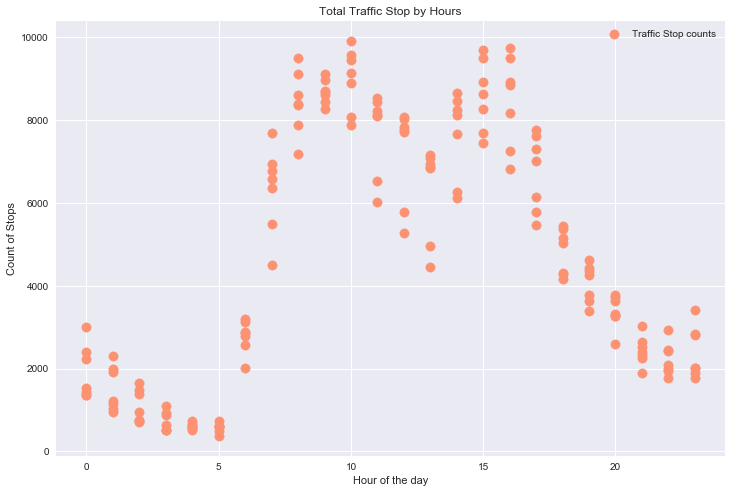

In [129]:
# create a new aggregated dataframe with new calculcated column and dra scatter plot
newdf2 = VT_traf_2015_main.groupby(['hour','dayofweek']).id.count().reset_index()
newdf2.plot.scatter(x='hour', y='id', figsize=(12, 8), color='#fc9272', label='Traffic Stop counts', s=90);
plt.xlabel('Hour of the day')
plt.ylabel('Count of Stops')
plt.title('Total Traffic Stop by Hours')
plt.show()

• **Plotting the Traffic stop distribution between Age and Time of day.**

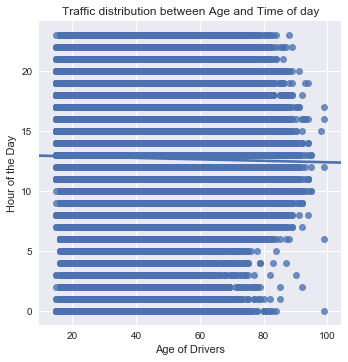

In [130]:
import seaborn as sns
sns.lmplot(x= 'driver_age', y= 'hour', data=VT_traf_2015_main)
plt.xlabel('Age of Drivers')
plt.ylabel('Hour of the Day')
plt.title('Traffic distribution between Age and Time of day')
plt.show()
